In [41]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [59]:
#get the data from the csv file and put it in a dataframe
df = pd.read_csv('/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/Sample_9000_manual.csv')

In [80]:
df.head()

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,0,1.0,1,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason
1,0,1.0,9,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason
2,0,1.0,1,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason
3,3,1.0,1,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason
4,1,1.0,3,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful


In [61]:
#drop the columns that are not needed
df.drop(['Unnamed: 0', 'repo_id', 'status', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)

In [55]:
df.head()

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,0,1.0,1,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,No reason
1,0,1.0,9,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,No reason
2,0,1.0,1,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,No reason
3,3,1.0,1,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,No reason
4,1,1.0,3,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,Successful


In [6]:
grouped_data = df.groupby(['author_eth', 'manual_analysis']).size().reset_index(name='count')
print(grouped_data)


   author_eth manual_analysis  count
0         API         Chaotic      3
1         API       Duplicate     21
2         API  Merge Conflict      8
3         API       No reason     89
4         API          Not PR      3
5         API         Quality     32
6         API        Replaced     69
7         API        Resolved     76
8         API           Stale     20
9         API      Successful    183
10        API     Unnecessary    118
11      Black         Chaotic      1
12      Black       Duplicate      1
13      Black         Quality      1
14      Black        Replaced      1
15      Black        Resolved      2
16      Black           Stale      1
17      Black      Successful      4
18   Hispanic         Chaotic      2
19   Hispanic       Duplicate      7
20   Hispanic  Merge Conflict      1
21   Hispanic       No reason     34
22   Hispanic         Quality     12
23   Hispanic        Replaced     24
24   Hispanic        Resolved     28
25   Hispanic           Stale      5
2

In [7]:
#how many values in column author_eth has the value 'Black
print(df['author_eth'].value_counts())

author_eth
White       5155
Unknown     2981
API          622
Hispanic     217
Black         11
Name: count, dtype: int64


In [35]:
pivot_table = grouped_data.pivot_table(index='author_eth', columns='manual_analysis', values='count', fill_value=0)
print(pivot_table)


manual_analysis  Chaotic  Duplicate  Merge Conflict  No reason  Not PR   
author_eth                                                               
API                    3         21               8         89       3  \
Black                  1          1               0          0       0   
Hispanic               2          7               1         34       0   
Unknown               18        119              44        543      12   
White                 14        235              51        636       5   

manual_analysis  Quality  Replaced  Resolved  Stale  Successful  Unnecessary  
author_eth                                                                    
API                   32        69        76     20         183          118  
Black                  1         1         2      1           4            0  
Hispanic              12        24        28      5          52           52  
Unknown              167       251       313     91         722          701  
White  

In [36]:
pivot_table['Total'] = pivot_table.sum(axis=1)
for col in pivot_table.columns[:-1]:  # Exclude the 'Total' column
    pivot_table[col] = (pivot_table[col] / pivot_table['Total']) * 100

#make a dataframe of the pivot table
pivot_df = pd.DataFrame(pivot_table)
print(pivot_table)

manual_analysis   Chaotic  Duplicate  Merge Conflict  No reason    Not PR   
author_eth                                                                  
API              0.482315   3.376206        1.286174  14.308682  0.482315  \
Black            9.090909   9.090909        0.000000   0.000000  0.000000   
Hispanic         0.921659   3.225806        0.460829  15.668203  0.000000   
Unknown          0.603824   3.991949        1.476015  18.215364  0.402549   
White            0.271581   4.558681        0.989331  12.337536  0.096993   

manual_analysis   Quality   Replaced   Resolved     Stale  Successful   
author_eth                                                              
API              5.144695  11.093248  12.218650  3.215434   29.421222  \
Black            9.090909   9.090909  18.181818  9.090909   36.363636   
Hispanic         5.529954  11.059908  12.903226  2.304147   23.963134   
Unknown          5.602147   8.419993  10.499832  3.052667   24.220060   
White            5.722

In [38]:
pivot_df

manual_analysis,Chaotic,Duplicate,Merge Conflict,No reason,Not PR,Quality,Replaced,Resolved,Stale,Successful,Unnecessary,Total
author_eth,,,,,,,,,,,,
API,0.482315,3.376206,1.286174,14.308682,0.482315,5.144695,11.093248,12.218650,3.215434,29.421222,18.971061,622
Black,9.090909,9.090909,0.000000,0.000000,0.000000,9.090909,9.090909,18.181818,9.090909,36.363636,0.000000,11
Hispanic,0.921659,3.225806,0.460829,15.668203,0.000000,5.529954,11.059908,12.903226,2.304147,23.963134,23.963134,217
Unknown,0.603824,3.991949,1.476015,18.215364,0.402549,5.602147,8.419993,10.499832,3.052667,24.220060,23.515599,2981
White,0.271581,4.558681,0.989331,12.337536,0.096993,5.722599,9.796314,12.065955,3.064985,29.738118,21.357905,5155


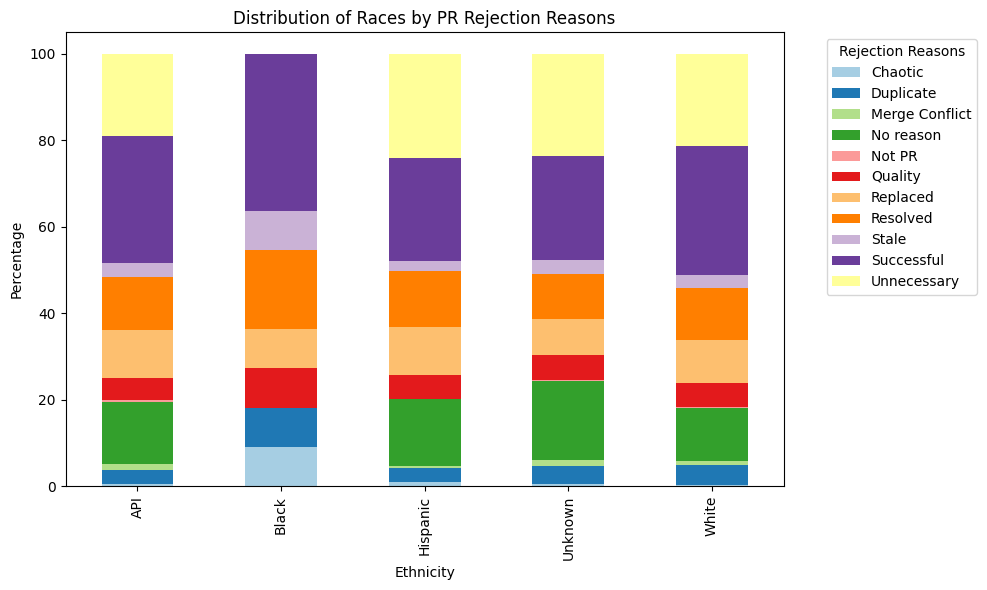

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
# remove the total column
pivot_table = pivot_table.drop('Total', axis=1)
custom_palette = sns.color_palette("Paired", n_colors=len(df['manual_analysis'].unique()))
pivot_table.plot(kind='bar', stacked=True, ax=ax, color=custom_palette)

# Add labels and legend
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Races by PR Rejection Reasons')
ax.legend(title='Rejection Reasons', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

## Feature importance with race in mind

In [83]:
#make a copy of the dataframe called df_encoded
df_encoded = df.copy()
#replace the nan values with \N where the
df_encoded = df_encoded.replace(np.nan, '\\N')
#encode the categorical data which are author_eth and manual_analysis, author_country, author_continent, closer_eth, closer_country, prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
le = LabelEncoder()
df_encoded['author_eth'] = le.fit_transform(df_encoded['author_eth'])

df_encoded['manual_analysis'] = le.fit_transform(df_encoded['manual_analysis'])
df_encoded['author_country'] = le.fit_transform(df_encoded['author_country'])
df_encoded['author_continent'] = le.fit_transform(df_encoded['author_continent'])
df_encoded['closer_eth'] = le.fit_transform(df_encoded['closer_eth'])
df_encoded['prs_eth_8'] = le.fit_transform(df_encoded['prs_eth_8'])
df_encoded['prs_eth_7'] = le.fit_transform(df_encoded['prs_eth_7'])
df_encoded['prs_eth_9'] = le.fit_transform(df_encoded['prs_eth_9'])
df_encoded['prs_eth_diff_2'] = le.fit_transform(df_encoded['prs_eth_diff_2'])
df_encoded['prs_eth_diff'] = le.fit_transform(df_encoded['prs_eth_diff'])
df_encoded['closer_country'] = le.fit_transform(df_encoded['closer_country'])

#encode these knowing that some of the values are not strings
df_encoded['prs_white'] = df_encoded['prs_white'].apply(lambda col: le.fit_transform(col.astype(str)) if col.dtypes == object else col)
df_encoded['prs_black'] = df_encoded['prs_black'].apply(lambda col: le.fit_transform(col.astype(str)))
df_encoded['prs_api'] = df_encoded['prs_asian'].apply(lambda col: le.fit_transform(col.astype(str)))
df_encoded['prs_hispanic'] = df_encoded['prs_hispanic'].apply(lambda col: le.fit_transform(col.astype(str)))



AttributeError: 'float' object has no attribute 'dtypes'

In [78]:
#show the rows that have nan values
df_encoded[df_encoded.isna().any(axis=1)]

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
32,9,7.0,6,0,75,7,0,3,4,0,NaN,NaN,NaN,NaN,0.948500,0.001973,0.001480,0.006910,3,3,3,3,3,8
40,1,1.0,1,0,0,7,0,3,4,0,NaN,NaN,NaN,NaN,0.960851,0.027207,0.002208,0.007936,3,3,3,3,3,5
86,1,2.0,1,0,75,7,0,3,4,0,NaN,NaN,NaN,NaN,0.938687,0.057484,0.000803,0.001115,3,3,3,3,3,5
88,12,5.0,5,45,76,2,0,3,4,0,NaN,NaN,NaN,NaN,0.995234,0.001050,0.001057,0.001365,3,3,3,3,3,10
90,1,3.0,2,34,0,4,0,3,3,0,NaN,NaN,NaN,NaN,0.303911,0.002034,0.686865,0.004707,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,8,1.0,1,73,0,2,0,4,3,0,0.993536,0.004356,0.000147,0.001954,NaN,NaN,NaN,NaN,4,4,4,4,4,7
8945,3,1.0,1,0,76,7,0,3,4,0,NaN,NaN,NaN,NaN,0.942396,0.025839,0.003431,0.025395,3,3,3,3,3,9
8953,1,1.0,1,0,0,7,0,3,3,0,NaN,NaN,NaN,NaN,0.401819,0.020708,0.009631,0.566335,3,3,3,3,3,9
8958,0,1.0,1,0,76,7,0,3,4,0,NaN,NaN,NaN,NaN,0.940821,0.048799,0.005431,0.002498,3,3,3,3,3,3


In [70]:
df_encoded.head()

,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,manual_analysis
0,0,1.0,1,0,0,7,0,3,0,0,0.8892,0.008001,0.08811,0.014689,0.059421,0.003402,0.933594,0.001673,3,4,3,4,4,3
1,0,1.0,9,0,14,7,0,3,3,0,0.8892,0.008001,0.08811,0.014689,0.569895,0.03257,0.367695,0.028239,3,4,3,4,4,3
2,0,1.0,1,33,76,4,0,4,4,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,4,4,4,4,4,3
3,3,1.0,1,41,66,2,0,0,4,0,0.024666,0.97511,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,0,0,0,0,0,3
4,1,1.0,3,73,27,2,0,4,4,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,4,4,4,4,4,9


### Random forest

In [71]:
X = df_encoded.drop(['manual_analysis'], axis=1)
y = df_encoded['manual_analysis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Train a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Determine feature importances
feature_importances = rf_classifier.feature_importances_

ValueError: could not convert string to float: '\\N'